# MLP - Classificação de sobrevivência no Titanic

**Grupo: Juan Felipe Serafim dos Santos (jfss) e Rodrigo Rossiter Guimarães Filho (rrgf)**

## Objetivo

Este é um mini-projeto focado na implementação e experimentação de uma rede neural do tipo Multilayer Perceptron (MLP) para a classificação da sobrevivência de passageiros do Titanic. O objetivo principal é aplicar técnicas de aprendizado de máquina para prever se uma pessoa sobreviveria ou não ao desastre do Titanic com base em atributos como idade, sexo, classe da cabine, etc.

## Projeto

### Conectando o google colab ao drive

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importando bibliotecas e dados

In [36]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import rcParams

rcParams['figure.figsize'] = 10, 8

### Importando os dados e tratando eles



In [37]:
# Importando os dados presentes no drive
df = pd.read_csv('/content/drive/MyDrive/SI/MLP/train.csv')

# Descartando colunas irrelevantes
df.drop(columns=['Name', 'PassengerId'], inplace=True)

# Substituindo valores NaN
df.fillna(0, inplace=True)

### Estrutura dos dados

In [38]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,0,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,0,S


### Separando features e target

In [39]:
X = df.drop(columns=['Survived'])
y = df['Survived']

### Dividindo o conjunto de teste e treinamento

In [40]:
# Codificar variáveis categóricas em variáveis binárias
X_encoded = pd.get_dummies(X)

# Divisão do conjunto
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=1)

### Normalizando os dados

In [41]:
# Padronizando os dados de treinamento usando o StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Criação e treinamento do modelo

In [ ]:
# Criação do modelo MLP
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)

# Treinamento do modelo
clf.fit(X_train_scaled, y_train)

### Previsão e avaliação do modelo

In [43]:
# Realizando as previsões
y_pred = clf.predict(X_test_scaled)

# Apresentando o relatório de classificação
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       128
           1       0.83      0.67      0.74        95

    accuracy                           0.80       223
   macro avg       0.81      0.79      0.79       223
weighted avg       0.81      0.80      0.80       223



### Matriz de confusão

In [44]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[115,  13],
       [ 31,  64]])

<Axes: >

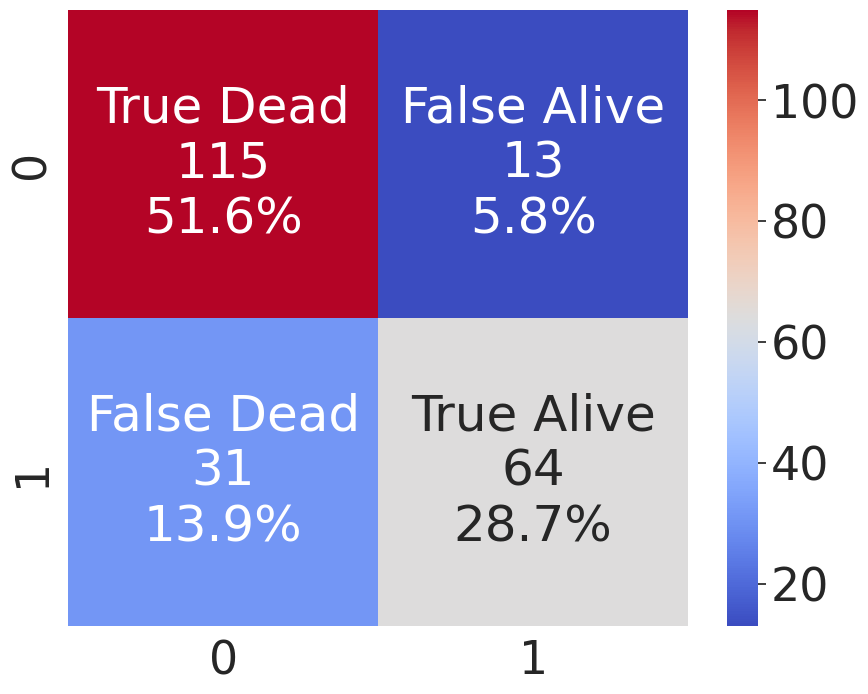

In [45]:
group_names = ['True Dead', 'False Alive', 'False Dead', 'True Alive']
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.1%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

sns.set(font_scale=3)
sns.heatmap(cm, annot=labels, fmt='', cmap='coolwarm')